# Analyzing Coursera Data

Looking For Trends in Coursera Computer Science Courses

## Imports

Libraries

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.express as px

Dataset turned into dataframe so it is readable

In [2]:
raw_coursera = pd.read_json('courseInfov2.JSON')
pd.set_option('display.max_columns', None)


Breaking up ReviewStarPercentage into each individual star/percentage to read them individually

In [3]:
myDict = {
    'reviewStarPercentage': raw_coursera['reviewStarPercentage']
}
fiveStarList = []
fourStarList = []
threeStarList = []
twoStarList = []
oneStarList = []

for i in myDict['reviewStarPercentage']:
    try:
        fiveStarList.append(i[0][1]) 
    except:
        fiveStarList.append(0)
    try:
        fourStarList.append(i[1][1])
    except:
        fourStarList.append(0)
    try:
        threeStarList.append(i[2][1])
    except:
        threeStarList.append(0)
    try:
        twoStarList.append(i[3][1])
    except:
        twoStarList.append(0)
    try:
        oneStarList.append(i[4][1])
    except:
        oneStarList.append(0)
        
raw_coursera['fiveStarReviewPercentage'] = fiveStarList
raw_coursera['fourStarReviewPercentage'] = fourStarList
raw_coursera['threeStarReviewPercentage'] = threeStarList
raw_coursera['twoStarReviewPercentage'] = twoStarList
raw_coursera['oneStarReviewPercentage'] = oneStarList

## Cleaning the Data

Removes non-numerical text from numerical data

In [4]:
coursera = raw_coursera.copy(deep=True) 

coursera['enrolledCount'] = raw_coursera['enrolledCount'].str.replace('\D+', '', regex=True)
coursera['ratingCount'] = raw_coursera['ratingCount'].str.replace('\D+', '', regex=True)
coursera['ratingPercentage'] = raw_coursera['ratingPercentage'].str.replace('\D+', '', regex=True)
coursera['instructorRatingCount'] = raw_coursera['instructorRatingCount'].str.replace('\D+', '', regex=True)  
coursera['fiveStarReviewPercentage'] = raw_coursera['fiveStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['fourStarReviewPercentage'] = raw_coursera['fourStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['threeStarReviewPercentage'] = raw_coursera['threeStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['twoStarReviewPercentage'] = raw_coursera['twoStarReviewPercentage'].str.replace('%', '', regex=True)
coursera['oneStarReviewPercentage'] = raw_coursera['oneStarReviewPercentage'].str.replace('%', '', regex=True)
coursera.head()

link       date  \
0  https://www.coursera.org/learn/introduction-to... 2023-08-05   
1  https://www.coursera.org/learn/how-computers-w... 2023-08-05   
2  https://www.coursera.org/learn/mathematics-for... 2023-08-05   
3  https://www.coursera.org/learn/python-for-appl... 2023-08-05   
4  https://www.coursera.org/learn/what-is-datasci... 2023-08-05   

                                       title  \
0       Introduction to Computer Programming   
1                         How Computers Work   
2           Mathematics for Computer Science   
3  Python for Data Science, AI & Development   
4                      What is Data Science?   

                                          subheading ratingPercentage rating  \
0  This course is part of Introduction to Compute...               91    4.1   
1  This course is part of Introduction to Compute...               94    4.6   
2  This course is part of Introduction to Compute...               82    4.1   
3  This course is part of multiple programs. \nLe...               93    4.6   
4  This course is part of multiple programs. \nLe...               97    4.7   

  ratingCount enrolledCount  recentViews instructorRatingCount  \
0         805         69167           -1                   202   
1         508         32711           -1                   122   
2         203         30138           -1                    51   
3       32545        608517           -1                  6493   
4       64199        817744           -1                 16960   

   instructorRating  reviewCount  reviewRating  \
0               4.3           -1           4.1   
1               4.7           -1           4.6   
2               4.6           -1           4.1   
3               4.5           -1           4.6   
4               4.7           -1           4.7   

                                     aboutThisCourse  contentRating  \
0  There are 3 modules in this course\n\nThis MOO...             -1   
1  There are 4 modules in this course\n\nComputer...             -1   
2  There are 6 modules in this course\n\n“Welcome...             -1   
3  There are 5 modules in this course\n\nKickstar...             -1   
4  There are 3 modules in this course\n\nDo you w...             -1   

   contentRatingCount                                           syllabus  \
0                  -1  [[Your development environment, 9 hours to com...   
1                  -1  [[Abstraction, 1 hour to complete, This week s...   
2                  -1  [[Number bases - binary, 7 hours to complete, ...   
3                  -1  [[Python Basics, 2 hours to complete, This mod...   
4                  -1  [[Defining Data Science and What Data Scientis...   

                                            partners  \
0  [University of London, Goldsmiths, University ...   
1  [University of London, Goldsmiths, University ...   
2  [University of London, Goldsmiths, University ...   
3                                              [IBM]   
4                                              [IBM]   

                                    whatYouWillLearn  \
0                                                 []   
1                                                 []   
2  [1.     Transform numbers between number bases...   
3  [Describe Python Basics including Data Types, ...   
4  [Define data science and its importance in tod...   

                                              skills  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [Data Science, Python Programming, Data Analys...   
4  [Data Science, Deep Learning, Machine Learning...   

                                       productGlance  \
0  [[Beginner level, No previous experience neces...   
1  [[Beginner level, No previous experience neces...   
2  [[Beginner level, No previous experience neces...   
3  [[Beginner level, Recommended experience], [23...   
4 

Turns string format numerical data into actual numbers to read

In [5]:
coursera["enrolledCount"] = pd.to_numeric(coursera["enrolledCount"])
coursera["ratingPercentage"] = pd.to_numeric(coursera["ratingPercentage"])
coursera["rating"] = pd.to_numeric(coursera["rating"], errors='coerce')
coursera["ratingCount"] = pd.to_numeric(coursera["ratingCount"])
coursera["instructorRatingCount"] = pd.to_numeric(coursera["instructorRatingCount"])
coursera["instructorRating"] = pd.to_numeric(coursera["instructorRating"])
coursera["reviewRating"] = pd.to_numeric(coursera["reviewRating"])
coursera["fiveStarReviewPercentage"] = pd.to_numeric(coursera["fiveStarReviewPercentage"])
coursera["fourStarReviewPercentage"] = pd.to_numeric(coursera["fourStarReviewPercentage"])
coursera["threeStarReviewPercentage"] = pd.to_numeric(coursera["threeStarReviewPercentage"])
coursera["twoStarReviewPercentage"] = pd.to_numeric(coursera["twoStarReviewPercentage"])
coursera["oneStarReviewPercentage"] = pd.to_numeric(coursera["oneStarReviewPercentage"])

Removes Duplicates

In [6]:
coursera['partners'] = coursera['partners'].apply(tuple)

coursera = coursera.drop_duplicates(subset=["title", "partners"], keep='first')

In [7]:
coursera = coursera.reset_index(drop=True)

## Creating New Columns

Function made to that checks whether a row contains a keywords

In [8]:
def keywordCheck(keyword, column):
    myList = []
    for i in column:
        try:
            if keyword in i:
                myList.append(True)
            else:
                myList.append(False)
        except: continue
    return myList

Adds column that shows whether a course contains a certain skill

In [9]:
coursera["hasPython"] = keywordCheck("Python Programming", coursera["skills"])
coursera["hasMachineLearning"] = keywordCheck("Machine Learning", coursera["skills"])
coursera["hasDataAnalysis"] = keywordCheck("Data Analysis", coursera["skills"])
coursera["hasDataScience"] = keywordCheck("Data Science", coursera["skills"])
coursera["hasAlgorithms"] = keywordCheck("Algorithms", coursera["skills"])
coursera["hasSQL"] = keywordCheck("SQL", coursera["skills"])
coursera["hasAI"] = keywordCheck("Artificial Intelligence (AI)", coursera["skills"])
coursera["hasRProgramming"] = keywordCheck("R Programming", coursera["skills"])
coursera["hasDataVisualization"] = keywordCheck("Data Visualization (DataViz)", coursera["skills"])
coursera["hasDebugging"] = keywordCheck("Debugging", coursera["skills"])
coursera["hasCloudComputing"] = keywordCheck("Cloud Computing", coursera["skills"])
coursera["hasMySQL"] = keywordCheck("MySQL", coursera["skills"])
coursera["hasDeepLearning"] = keywordCheck("Deep Learning", coursera["skills"])
coursera["hasCProgramming"] = keywordCheck("C Programming", coursera["skills"])
coursera["hasTensorflow"] = keywordCheck("Tensorflow", coursera["skills"])
coursera["hasLinux"] = keywordCheck("Linux", coursera["skills"])
coursera["hasJavaScript"] = keywordCheck("JavaScript", coursera["skills"])
coursera["hasInternetOfThings"] = keywordCheck("Internet Of Things (IOT)", coursera["skills"])
coursera["hasDatabase"] = keywordCheck("Database (DBMS)", coursera["skills"])
coursera["hasDjango"] = keywordCheck("Django (Web Framework)", coursera["skills"])
coursera["hasFrontEnd"] = keywordCheck("Front-End Web Development", coursera["skills"])
coursera["hasGithub"] = keywordCheck("Github", coursera["skills"])

# Single Variable EDA

## Bar Graphs

In [10]:
array = coursera['skills']
skillsDict = {}

for skills_list in array:
    if isinstance(skills_list, list):
        for skill in skills_list:
            if skill not in skillsDict:
                skillsDict[skill] = 1
            else:
                skillsDict[skill] += 1

"""uniqueSkillsValue = len(skillsDict)
print(f'''Unique Skills: {uniqueSkillsValue}\n-----------------\n''')

for keys, value in skillsDict.items():
    print(f'''{keys} = {value}''')"""

"uniqueSkillsValue = len(skillsDict)\nprint(f'''Unique Skills: {uniqueSkillsValue}\n-----------------\n''')\n\nfor keys, value in skillsDict.items():\n    print(f'''{keys} = {value}''')"

In [11]:
sortedList = sorted(skillsDict.items(), key=lambda x:x[1], reverse=True)
sortedSkillsDict = dict(sortedList)

skillsdf = pd.DataFrame.from_dict({"Skills": [key for key in sortedSkillsDict.keys()][0:15], "Occurences": [value for value in sortedSkillsDict.values()][0:15]})

fig = px.bar(skillsdf, y='Skills', x='Occurences')
fig.update_layout(title_text='Top 15 Most Occuring Skills')

fig.show()

Python Programming, Machine Learning is very popular, then a little drop off to Data Analysis/Science, then a drop off with the rest of the top 10 Occuring Skills.

Cutoff after Algorithms

May be beneficial to look at the next 5-10 occuring skills and compare those topics with the rest of the top 10

In [12]:
skillsdf = pd.DataFrame.from_dict({"Skills": [key for key in sortedSkillsDict.keys()][7:25], "Occurences": [value for value in sortedSkillsDict.values()][7:25]})

fig = px.bar(skillsdf, y='Skills', x='Occurences')
fig.update_layout(title_text='Top 7-25 Most Occuring Skills')

fig.show()

Skill Count has Steady Decrease

In [13]:
array = coursera['productGlance']
productGlanceDict = {}

for glance_list in coursera['productGlance']:
    if isinstance(glance_list, list) and len(glance_list) > 0:
        first_item = glance_list[0]
        # Convert the first item to a string and use it as the key
        first_item_str = str(first_item)
        if first_item_str not in productGlanceDict:
            productGlanceDict[first_item_str] = 1
        else:
            productGlanceDict[first_item_str] += 1

sortedList = sorted(productGlanceDict.items(), key=lambda x:x[1], reverse=True)
sortedProductGlanceDict = dict(sortedList)

"""uniqueProductGlanceValue = len(productGlanceDict)
print(f'''Unique Product Glance: {uniqueProductGlanceValue}\n-----------------\n''')

for keys, value in sortedProductGlanceDict.items():
    print(f'''{keys} = {value}''')"""
    

"uniqueProductGlanceValue = len(productGlanceDict)\nprint(f'''Unique Product Glance: {uniqueProductGlanceValue}\n-----------------\n''')\n\nfor keys, value in sortedProductGlanceDict.items():\n    print(f'''{keys} = {value}''')"

In [14]:
skillsdf = pd.DataFrame.from_dict({"Product Glance": [key for key in sortedProductGlanceDict.keys()][0:10], "Occurences": [value for value in sortedProductGlanceDict.values()][0:10]})

fig = px.bar(skillsdf, y='Product Glance', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Product Glance')

fig.show()

Flexible schedule is universal within the courses.

Courses have different hours, it may be useful to group the courses by hours to complete and see if it makes a difference

Courses have different levels, it may be useful to group the courses by level and see if it makes a difference

In [15]:
from collections import Counter

# Initialize a Counter object
learnerCareerOutcomesCounter = Counter()

# Iterate over each row in the 'learnerCareerOutcomes' column
for outcomes_list in coursera['learnerCareerOutcomes']:
    if isinstance(outcomes_list, list):
        # Extend the Counter with the outcomes in the list
        learnerCareerOutcomesCounter.update(outcomes_list)

# Convert the Counter to a regular dictionary if needed
learnerCareerOutcomesDict = dict(learnerCareerOutcomesCounter)

sortedList = sorted(learnerCareerOutcomesDict.items(), key=lambda x:x[1], reverse=True)
sortedLearnerCareerOutcomesDict = dict(sortedList)

"""uniqueLearnerCareerOutcomesValue = len(learnerCareerOutcomesDict)
print(f'''Unique Learner Career Outcomes: {uniqueLearnerCareerOutcomesValue}\n-----------------\n''')

for keys, value in sortedLearnerCareerOutcomesDict.items():
    print(f'''{keys} = {value}''')"""
    

"uniqueLearnerCareerOutcomesValue = len(learnerCareerOutcomesDict)\nprint(f'''Unique Learner Career Outcomes: {uniqueLearnerCareerOutcomesValue}\n-----------------\n''')\n\nfor keys, value in sortedLearnerCareerOutcomesDict.items():\n    print(f'''{keys} = {value}''')"

In [16]:
skillsdf = pd.DataFrame.from_dict({"Learner Career Outcomes": [key for key in sortedLearnerCareerOutcomesDict.keys()][0:10], "Occurences": [value for value in sortedLearnerCareerOutcomesDict.values()][0:10]})

fig = px.bar(skillsdf, y='Learner Career Outcomes', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Learner Career Outcomes')

fig.show()

Top 3 Learner Career Outcomes are universal

Earn a Shareable Certificate may be interesting to look at

Build Your Subject Matter Expertise has other "{INSERT BUILD YOUR}" Expertise, but at much lower counts

This course is available as part of multiple programs... is interesting to look at

Maybe we can compare earn a shareable career certificate from XYZ with the courses that doesnt share career certificate

In [17]:
array = coursera['detailsToKnow']
detailsToKnowDict = {}

# Iterate over each row in the 'detailsToKnow' column
for details_list in coursera['detailsToKnow']:
    if isinstance(details_list, list):
        for sublist in details_list:
            if sublist and isinstance(sublist, list) and sublist[0]:
                first_item = sublist[0]
                if first_item not in detailsToKnowDict:
                    detailsToKnowDict[first_item] = 1
                else:
                    detailsToKnowDict[first_item] += 1
sortedList = sorted(detailsToKnowDict.items(), key=lambda x:x[1], reverse=True)
sortedDetailsToKnowDict = dict(sortedList)

In [18]:
detailsToKnowdf = pd.DataFrame.from_dict({"Details To Know": [key for key in sortedDetailsToKnowDict.keys()][0:10], "Occurences": [value for value in sortedDetailsToKnowDict.values()][0:10]})


fig = px.bar(detailsToKnowdf, y='Details To Know', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Details To Know')

fig.show()

Recently Updated is interesting to look at, can compare with that and the rest of the courses

In [19]:
from collections import Counter

# Initialize a Counter object
partnersCounter = Counter()

# Iterate over each row in the 'partners' column
for partners_tuple in coursera['partners']:
    if isinstance(partners_tuple, tuple):
        # Extend the Counter with the items in the tuple
        partnersCounter.update(partners_tuple)

# Get the sorted dictionary by count in descending order
sortedPartnersDict = dict(sorted(partnersCounter.items(), key=lambda x: x[1], reverse=True))


"""uniquePartnerValue = len(partnersDict)
print(f'''Unique Partners: {uniquePartnerValue}\n-----------------\n''')

for keys, value in partnersDict.items():
    print(f'''{keys} = {value}''')"""

"uniquePartnerValue = len(partnersDict)\nprint(f'''Unique Partners: {uniquePartnerValue}\n-----------------\n''')\n\nfor keys, value in partnersDict.items():\n    print(f'''{keys} = {value}''')"

In [20]:
detailsToKnowdf = pd.DataFrame.from_dict({"Partners": [key for key in sortedPartnersDict.keys()][0:10], "Occurences": [value for value in sortedPartnersDict.values()][0:10]})


fig = px.bar(detailsToKnowdf, y='Partners', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Partners')

fig.show()

Instructors dominated by IBM, it may be useful to look at if the providers actually matter

In [21]:
array = coursera['instructors']
instructorsDict = {}

for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] == "Top Instructor":
            if not (array[i][j][1] in instructorsDict):
                instructorsDict[array[i][j][1]] = 1
            else:
                instructorsDict[array[i][j][1]] += 1
        else:
            if not (array[i][j][0] in instructorsDict):
                instructorsDict[array[i][j][0]] = 1
            else:
                instructorsDict[array[i][j][0]] += 1 

sortedList = sorted(instructorsDict.items(), key=lambda x:x[1], reverse=True)
sortedInstructorsDict = dict(sortedList)

"""uniqueInstructorsValue = len(instructorsDict)
print(f'''Unique Instructors: {uniqueInstructorsValue}\n-----------------\n''')

for keys, value in instructorsDict.items():
    print(f'''{keys} = {value}''')"""


"uniqueInstructorsValue = len(instructorsDict)\nprint(f'''Unique Instructors: {uniqueInstructorsValue}\n-----------------\n''')\n\nfor keys, value in instructorsDict.items():\n    print(f'''{keys} = {value}''')"

In [22]:
instructorsdf = pd.DataFrame.from_dict({"Instructors": [key for key in sortedInstructorsDict.keys()][0:10], "Occurences": [value for value in sortedInstructorsDict.values()][0:10]})


fig = px.bar(instructorsdf, y='Instructors', x='Occurences')
fig.update_layout(title_text='Top 10 Most Occuring Instructors')

fig.show()

META Staff is dominating, seems pretty correlated to the partners because most partners have the same people instructing. Maybe instructors matter more than the provider? Or not, interesting to look at

# Pairwise EDA

## Scatter plots

In [23]:
fig = px.scatter(coursera, y="enrolledCount", x="instructorRating")
fig.show()


Seems like successful courses need at least a 4.25 instructor rating

In [24]:
underThreshold = coursera[coursera['instructorRating'] < 4.25]
overThreshold = coursera[coursera['instructorRating'] > 4.25]

print(f'''under 4.25 mean Enrolled Count: {underThreshold['enrolledCount'].mean()}''')
print(f'''over 4.25 mean Enrolled Count: {overThreshold['enrolledCount'].mean()}''')

under 4.25 mean Enrolled Count: 17644.814159292036
over 4.25 mean Enrolled Count: 91373.19565217392


In [25]:
coursera["instructorRatingFraction"] = coursera['instructorRatingCount'] / coursera['enrolledCount']

In [26]:
fig = px.scatter(coursera, y="enrolledCount", x="instructorRatingFraction")
fig.show()

Looks like the ratio of instructor interaction/enrolled matters and is positively correlated

In [27]:
fig = px.scatter(coursera, y="enrolledCount", x="instructorRatingCount")
fig.show()

Looks like enrolledCount and instructorRatingCount are positively correlated. Might just be because more enrolled means more chances for people to comment. Maybe investigate if its a linear trend

In [28]:
coursera["ratingFraction"] = coursera['ratingCount'] / coursera['enrolledCount']

In [29]:
fig = px.scatter(coursera, y="enrolledCount", x="ratingFraction")
fig.show()

Looks like rating fraction does matter and is positively correlated with enrolled Count

In [30]:
fig = px.scatter(coursera, y="enrolledCount", x="ratingCount")
fig.show()

Looks like enrolledCount and instructorRatingCount are positively correlated. Might just be because more enrolled means more chances for people to comment. Maybe investigate if its a linear relationship

In [31]:
fig = px.scatter(coursera, y="enrolledCount", x="reviewRating")
fig.show()

Looks like the review rating needs to be at least 4.5 for a course to be successful

In [32]:
underThreshold = coursera[coursera['reviewRating'] < 4.25]
overThreshold = coursera[coursera['reviewRating'] > 4.25]

print(f'''under 4.25 mean Enrolled Count: {underThreshold['enrolledCount'].mean()}''')
print(f'''over 4.25 mean Enrolled Count: {overThreshold['enrolledCount'].mean()}''')

under 4.25 mean Enrolled Count: 19554.261904761905
over 4.25 mean Enrolled Count: 87417.05679862306


In [33]:
fig = px.scatter(coursera, y="enrolledCount", x="ratingPercentage")
fig.show()

Looks like the ratingPercentage needs to be at least 91% for a good course

In [34]:
fig = px.scatter(coursera, y="enrolledCount", x="rating")
fig.update_layout(
    xaxis_range=[0, 5],  # Set x-axis range to 0-5
)
fig.show()

Looks like the rating needs to be at least 4.5 for a good course

In [35]:
fig = px.scatter(coursera, y="enrolledCount", x="fiveStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

Looks like the best courses have a five star review percentage from 65% to 90%. Anything above 90% is no good

In [36]:
fig = px.scatter(coursera, y="enrolledCount", x="fourStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

Looks like the best courses have a four star percentage from 10% to 25%

In [37]:
fig = px.scatter(coursera, y="enrolledCount", x="threeStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

The best 3 star percentage has the best success from 0%-5%

In [38]:
fig = px.scatter(coursera, y="enrolledCount", x="twoStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

The best 2 star percentage has the best success from 0%-2%

In [39]:
fig = px.scatter(coursera, y="enrolledCount", x="oneStarReviewPercentage")
fig.update_layout(
    xaxis_range=[-5, 100],  # Set x-axis range to 0-5
)
fig.show()

The best 2 star percentage has the best success from 0%-2%

## Violin Plots


In [40]:
fig = px.violin(coursera, y="enrolledCount", x="courseraPlus")
fig.show()

Looks like CourseraPlus does have a benefit

# Has a Certain Skill? Graphs

In [41]:
fig = px.violin(coursera, y="enrolledCount", x="hasPython")
fig.show()

Looks like python courses are popular

In [42]:
fig = px.violin(coursera, y="enrolledCount", x="hasMachineLearning")
fig.show()

Looks like machine learning is not actually that popular

In [43]:
fig = px.violin(coursera, y="enrolledCount", x="hasDataScience")
fig.show()

Looks like data science is popular

In [44]:
fig = px.violin(coursera, y="enrolledCount", x="hasDataAnalysis")
fig.show()

Looks like Data analysis is popular

In [45]:
fig = px.violin(coursera, y="enrolledCount", x="hasAlgorithms")
fig.show()

Looks like algorithms could help a little

In [46]:
fig = px.violin(coursera, y="enrolledCount", x="hasSQL")
fig.show()

Looks like has SQL is popular

In [47]:
fig = px.violin(coursera, y="enrolledCount", x="hasAI")
fig.show()

Looks like AI is not that important

In [48]:
fig = px.violin(coursera, y="enrolledCount", x="hasRProgramming")
fig.show()

Looks like R Programming is pretty good

## Comparing Skills With Each Other


First Group Courses by if they have a skill

In [49]:
boolean_columns = ['hasPython', 'hasMachineLearning', 'hasDataAnalysis', 'hasDataScience',
                   'hasAlgorithms', 'hasSQL', 'hasAI', 'hasRProgramming', 'hasDataVisualization',
                   'hasDebugging', 'hasCloudComputing', 'hasMySQL', 'hasDeepLearning',
                   'hasCProgramming', 'hasTensorflow', 'hasLinux', 'hasJavaScript',
                   'hasInternetOfThings', 'hasDatabase', 'hasDjango', 'hasFrontEnd', 'hasGithub']

# Create a dictionary to store separate DataFrames
dataframes = {}

# Iterate through the boolean columns and create separate DataFrames
for column in boolean_columns:
    dataframes[column] = coursera[coursera[column] == True]

In [50]:
# Calculate median of "enrolledCount" for each DataFrame
medians = {}
for df_name, df in dataframes.items():
    median = df['enrolledCount'].median()
    medians[df_name] = median

# Display the medians
"""for df_name, median in medians.items():
    print(f"Median for {df_name}: {median}")"""


'for df_name, median in medians.items():\n    print(f"Median for {df_name}: {median}")'

In [51]:
keys = list(medians.keys())
medians_values = list(medians.values())

# Create a bar plot using Plotly Express
fig = px.bar(y=keys, x=medians_values, labels={'x': 'Skill', 'y': 'Median Enrolled Count'},
             title='Median Enrolled Count vs Skill')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),)

# Show the plot
fig.show()

Deep Learning, data visualization, data science, data analysis, SQL is pretty good

In [52]:
# Calculate median of "enrolledCount" for each DataFrame
means = {}
for df_name, df in dataframes.items():
    mean = df['enrolledCount'].mean()
    means[df_name] = mean

# Display the medians
"""for df_name, mean in means.items():
    print(f"Median for {df_name}: {mean}")"""


'for df_name, mean in means.items():\n    print(f"Median for {df_name}: {mean}")'

In [53]:
keys = list(means.keys())
means_values = list(means.values())

fig = px.bar(y=keys, x=means_values, labels={'x': 'Skill', 'y': 'Mean Enrolled Count'},
             title='Median Enrolled Count vs Skill')

fig.update_layout(
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),)

# Show the plot
fig.show()

# Looking at Stuff thats in the Product Glance

## Looking at the Time it Takes to Finish a Course

In [54]:
import re

hoursToComplete = []
check = False

for array in coursera['productGlance']:
    check = False
    for array2 in array:
        for element in array2:
            if "hour" in element:
                hoursToComplete.append(re.sub(r'\D', '', element))
                check = True
                break
        if check == True:
            break
    if check == False:
        hoursToComplete.append(None)

In [55]:
coursera['hoursToComplete'] = hoursToComplete
coursera["hoursToComplete"] = pd.to_numeric(coursera["hoursToComplete"])

In [56]:
# Create a bar plot using Plotly Express
fig = px.scatter(coursera, y="enrolledCount", x="hoursToComplete",
             title='Enrolled Count vs Hours To Complete')

# Show the plot
fig.show()

Best hours are between 20-35 hours

Looks like the most popular Ranges ie between 15-30, especially in the high 10s, low 20s

## Looking at the Skill Level Required to Finish the Course 

In [57]:
coursera['productGlance'][0]

[['Beginner level', 'No previous experience necessary'],
 ['21 hours (approximately)', ''],
 ['Flexible schedule', 'Learn at your own pace'],
 ['Prepare for a degree', 'Learn more']]

In [58]:
check = False
experienceLevel = []

for array in coursera['productGlance']:
    check = False
    for array2 in array:
        for element in array2:
            if "level" in element:
                experienceLevel.append(element)
                check = True
                break
        if check == True:
            break
    if check == False:
        experienceLevel.append(None)


In [59]:
coursera['experienceLevel'] = experienceLevel
coursera.head()

link       date  \
0  https://www.coursera.org/learn/introduction-to... 2023-08-05   
1  https://www.coursera.org/learn/how-computers-w... 2023-08-05   
2  https://www.coursera.org/learn/mathematics-for... 2023-08-05   
3  https://www.coursera.org/learn/python-for-appl... 2023-08-05   
4  https://www.coursera.org/learn/what-is-datasci... 2023-08-05   

                                       title  \
0       Introduction to Computer Programming   
1                         How Computers Work   
2           Mathematics for Computer Science   
3  Python for Data Science, AI & Development   
4                      What is Data Science?   

                                          subheading  ratingPercentage  \
0  This course is part of Introduction to Compute...              91.0   
1  This course is part of Introduction to Compute...              94.0   
2  This course is part of Introduction to Compute...              82.0   
3  This course is part of multiple programs. \nLe...              93.0   
4  This course is part of multiple programs. \nLe...              97.0   

   rating  ratingCount  enrolledCount  recentViews  instructorRatingCount  \
0     4.1        805.0        69167.0           -1                  202.0   
1     4.6        508.0        32711.0           -1                  122.0   
2     4.1        203.0        30138.0           -1                   51.0   
3     4.6      32545.0       608517.0           -1                 6493.0   
4     4.7      64199.0       817744.0           -1                16960.0   

   instructorRating  reviewCount  reviewRating  \
0               4.3           -1           4.1   
1               4.7           -1           4.6   
2               4.6           -1           4.1   
3               4.5           -1           4.6   
4               4.7           -1           4.7   

                                     aboutThisCourse  contentRating  \
0  There are 3 modules in this course\n\nThis MOO...             -1   
1  There are 4 modules in this course\n\nComputer...             -1   
2  There are 6 modules in this course\n\n“Welcome...             -1   
3  There are 5 modules in this course\n\nKickstar...             -1   
4  There are 3 modules in this course\n\nDo you w...             -1   

   contentRatingCount                                           syllabus  \
0                  -1  [[Your development environment, 9 hours to com...   
1                  -1  [[Abstraction, 1 hour to complete, This week s...   
2                  -1  [[Number bases - binary, 7 hours to complete, ...   
3                  -1  [[Python Basics, 2 hours to complete, This mod...   
4                  -1  [[Defining Data Science and What Data Scientis...   

                                            partners  \
0  (University of London, Goldsmiths, University ...   
1  (University of London, Goldsmiths, University ...   
2  (University of London, Goldsmiths, University ...   
3                                             (IBM,)   
4                                             (IBM,)   

                                    whatYouWillLearn  \
0                                                 []   
1                                                 []   
2  [1.     Transform numbers between number bases...   
3  [Describe Python Basics including Data Types, ...   
4  [Define data science and its importance in tod...   

                                              skills  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [Data Science, Python Programming, Data Analys...   
4  [Data Science, Deep Learning, Machine Learning...   

                                       productGlance  \
0  [[Beginner level, No previous experience neces...   
1  [[Beginner level, No previous experience neces...   
2  [[Beginner level, No previous experience neces...   
3  [[Beginner level, Recomme

In [60]:
fig = px.violin(coursera, x="experienceLevel", y="enrolledCount", title="Enrolled Count vs Experience Level", box=True, points="all")
fig.show()

Beginner has the best chance of the top 1% enrolled coun course, but intermediate still has success

The harder the course, the harder it is to enroll

## Looking at Progress Towards A Degree

In [61]:
check = False
degree = []

for array in coursera['productGlance']:
    check = False
    for array2 in array:
        for element in array2:
            if "Prepare for" in element:
                degree.append(True)
                check = True
                break
        if check == True:
            break
    if check == False:
        degree.append(False)


In [62]:
coursera['progressDegree'] = degree

fig = px.violin(coursera, x='progressDegree', y= 'enrolledCount', title='progressDegree vs enrolledCount', box=True, points="all")
fig.show()

If a course earns a degree its pretty good

# Looking at Learner Career Outcome Stuff

In [63]:
coursera['learnerCareerOutcomes'][0]

['Build your subject-matter expertise',
 "This course is part of the Introduction to Computer Science and Programming Specialization\nWhen you enroll in this course, you'll also be enrolled in this Specialization.",
 'Learn new concepts from industry experts',
 'Gain a foundational understanding of a subject or tool',
 'Develop job-relevant skills with hands-on projects',
 'Earn a shareable career certificate']

In [64]:
check = False
certificate = []

for array in coursera['learnerCareerOutcomes']:
    check = False
    for element in array:
        if "Earn a shareable career certificate from Google" in element:
            certificate.append("Google")
            check = True
            break
        elif "Earn a shareable career certificate from IBM" in element:
            certificate.append("IBM")
            check = True
            break
        elif "Earn a shareable career certificate from Meta" in element:
            certificate.append("Meta")
            check = True
            break
        elif "Earn a shareable career certificate" in element:
            certificate.append("Other")
            check = True
            break
    if check == False:
        certificate.append("None")

In [65]:
coursera['earnCertificate'] = certificate

fig = px.violin(coursera, x='earnCertificate', y= 'enrolledCount', title='Earn Certificate vs enrolledCount', box=True, points="all")
fig.show()

Google certificates are popular and other

If Its From Google, Meta, IBM, certificate. Looks like all of them earn a certificate

In [66]:
check = False
multipleProgram = []

for array in coursera['learnerCareerOutcomes']:
    check = False
    for element in array:
        if "This course is available as part" in element:
            multipleProgram.append(True)
            check = True
            break
    if check == False:
        multipleProgram.append(False)

In [67]:
coursera['multipleProgram'] = multipleProgram

fig = px.violin(coursera, x='multipleProgram', y= 'enrolledCount', title='multipleProgram vs enrolledCount', box=True, points="all")
fig.show()

If the course is in multiple programs then it does not have too much impact

# Looking at Details to Know

In [68]:
coursera['detailsToKnow'][0]

[['Shareable certificate', 'Add to your LinkedIn profile'],
 ['Quizzes and assessments', '10 quizzes, 0 assessments'],
 ['English', 'Subtitles: German, Russian, \n+10 more']]

In [69]:
check = False
recentlyUpdated = []

for array in coursera['detailsToKnow']:
    check = False
    for array2 in array:
        for element in array2:
            if "Recently updated" in element:
                recentlyUpdated.append(True)
                check = True
                break
        if check == True:
            break
    if check == False:
        recentlyUpdated.append(False)

In [70]:
coursera['recentlyUpdated'] = recentlyUpdated

fig = px.violin(coursera, x='recentlyUpdated', y= 'enrolledCount', title='recentlyUpdated vs enrolledCount', box=True, points="all")
fig.show()

Recently Updated has no real impact

In [71]:
check = False
recentlyUpdated = []

for array in coursera['detailsToKnow']:
    check = False
    for array2 in array:
        for element in array2:
            if "Recently updated" in element:
                recentlyUpdated.append(True)
                check = True
                break
        if check == True:
            break
    if check == False:
        recentlyUpdated.append(False)

# Looking at Subheading

In [72]:
coursera['subheading'][0]
print(coursera['subheading'].index)

RangeIndex(start=0, stop=684, step=1)


In [73]:
check = False
largerCourseType = []

for element in coursera['subheading']:
    if "This course is part of multiple programs." in element:
            largerCourseType.append("Multiple Programs")
    elif "Specialization" in element:
            largerCourseType.append("Specialization")
    else:
        largerCourseType.append("None")

In [74]:
coursera['largerCourseType'] = largerCourseType

fig = px.violin(coursera, x='largerCourseType', y= 'enrolledCount', title='largerCourseType vs enrolledCount', box=True, points="all")
fig.show()

Doesn't really matter, multiple programs might be better

# Looking at Partners

In [75]:
partnerdf = coursera.explode('partners')

In [76]:
import plotly.graph_objects as go

unique_categories = partnerdf['partners'].unique()

plots = []
arr = []
count = 0
for category in unique_categories:
    if count < 5:
        arr.append(partnerdf[partnerdf['partners'] == category])
        count += 1
    else:
        df_subset = pd.concat(arr, ignore_index=True)
        fig = go.Figure(data=[go.Violin(x=df_subset['partners'], y=df_subset['enrolledCount'], points="all")])
        fig.update_layout(title=f'Numerical Values for Category {category}')
        fig.update_layout(
            yaxis_range=[0, 2500000],  # Set x-axis range to 0-5
        )
        plots.append(fig)
        count = 0
        arr = []
    
for plot in plots:
    plot.show()


## Amount of Courses a Partner Has vs Mean Enrolled Count

In [77]:
unique_categories = partnerdf['partners'].unique()
courseCount = {}
meanCount = {}

for category in unique_categories:
    catdf = partnerdf[partnerdf['partners'] == category]
    courseCount[category] = catdf.shape[0]
    meanCount[category] = catdf['enrolledCount'].mean()

data = {
    'courseCount': courseCount,
    'mean': meanCount
}

tempdf = pd.DataFrame(data)

fig = px.scatter(tempdf, x='courseCount', y= 'mean', title='courseCount vs mean')
fig.show()

# Looking at About This Course

In [78]:
def truncate_after_modules(text):
    position = text.find(" modules")
    if position != -1:
        return text[:position + len(" modules")]
    else:
        return text

def replace_greater_than_100(value):
    if value > 100:
        return None
    else:
        return value


ATC_df = coursera['aboutThisCourse'].apply(truncate_after_modules)
coursera['moduleCount'] = ATC_df.str.replace('\D+', '', regex=True)
coursera["moduleCount"] = pd.to_numeric(coursera["moduleCount"])
coursera['moduleCount'] = coursera['moduleCount'].apply(replace_greater_than_100)

fig = px.scatter(coursera, y='enrolledCount', x= 'moduleCount', title='moduleCount vs enrolledCount')
fig.show()


# Looking at Instructors

In [79]:
coursera['instructors'][16]

[['Top Instructor',
  'Google Career Certificates',
  'Google',
  ['286 Courses', '7,143,694 learners']]]

## Looking at Top Instructors

In [80]:
topInstructor = []
for arr in coursera['instructors']:
    flag = 0
    for arr2 in arr:
        for element in arr2:
            if element == "Top Instructor":
                topInstructor.append(True)
                flag = 1
                break
        if flag == 1:
            break
    if flag == 0:
        topInstructor.append(False)

coursera['containsTopInstructor'] = topInstructor

fig = px.violin(coursera, y='enrolledCount', x= 'containsTopInstructor', title='containsTopInstructor vs enrolledCount', box=True, points="all")
fig.show()

Top instructor matters

## Looking at Individual Instructors

In [81]:
topInstructorCount = []

for arr in coursera['instructors']:
    count = 0
    for arr2 in arr:
        for element in arr2:
            if element == "Top Instructor":
                count += 1
    topInstructorCount.append(count)               

coursera['topInstructorCount'] = topInstructorCount

fig = px.violin(coursera, y='enrolledCount', x= 'topInstructorCount', title='topInstructorCount vs enrolledCount', box=True, points="all")
fig.show()

In [82]:
instructorCount = []

for arr in coursera['instructors']:
    instructorCount.append(len(arr))               

coursera['instructorCount'] = instructorCount

fig = px.violin(coursera, y='enrolledCount', x= 'instructorCount', title='instructorCount vs enrolledCount', box=True, points="all")
fig.show()

# Correlation Matrix

DF with only numerical numbers

In [83]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

corr_dict = {
    'ratingPercentage': coursera['ratingPercentage'],
    'rating': coursera['rating'],
    'ratingCount': coursera['ratingCount'],
    'enrolledCount': coursera['enrolledCount'],
    'reviewRating': coursera['reviewRating'],
    'fiveStarRatingPercentage': coursera['fiveStarReviewPercentage'],
    'fourStarRatingPercentage': coursera['fourStarReviewPercentage'],
    'threeStarRatingPercentage': coursera['threeStarReviewPercentage'],
    'twoStarRatingPercentage': coursera['twoStarReviewPercentage'],
    'oneStarRatingPercentage': coursera['oneStarReviewPercentage'],
    'instructorRatingFraction': coursera['instructorRatingFraction'],
    'ratingFraction': coursera['ratingFraction'],
    'hoursToComplete': coursera['hoursToComplete'],
    'moduleCount': coursera['moduleCount'],
}

numdf = pd.DataFrame(corr_dict)

corr_matrix = numdf.corr()

corr_matrix = np.around(corr_matrix, decimals=2)
corr_matrix = corr_matrix.iloc[::-1]


heatmap = ff.create_annotated_heatmap(z=corr_matrix.values,
                                      x=list(corr_matrix.columns),
                                      y=list(corr_matrix.index),
                                      colorscale="RdBu")



heatmap.update_layout(title='Correlation Matrix Heatmap',
                      xaxis_title='Features',
                      yaxis_title='Features')
heatmap.show()


# Topic Modelling

In [84]:
data = {
    'syllabus' : coursera['syllabus'],
    'title' : coursera['title'],
    'aboutThisCourse' : coursera['aboutThisCourse']
}
tmdf = pd.DataFrame(data)

def flatten_array(arr):
    flat_string = ""
    for item in arr:
        if isinstance(item, list):
            flat_string += flatten_array(item)  # Recursively flatten nested lists
        elif isinstance(item, str):
            flat_string += item
            flat_string += ' '  # Add a space between elements
    return flat_string

# Apply the flattening function to the entire column
tmdf['syllabus'] = tmdf['syllabus'].apply(flatten_array)

print(tmdf['aboutThisCourse'][0])


There are 3 modules in this course

This MOOC provides you with the foundational skill set required to write computer programs. If you are interested in learning how to write interactive, graphical programs from an introductory level in a real programming language, this is the course for you. You will begin by learning the basics of editing and running programs. Then you will learn how to create 2D graphics using shapes and coordinates. Finally, you will learn how to create interactive graphics that you can control with the mouse. You will even solve a set of interactive puzzles using your coding skills in the Sleuth game which has been created especially for this course. The course uses the Javascript language and the p5.js library.

Read more


Cleaning

In [85]:
import re

# Remove punctuation
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('[,\.!?]', '', x))
tmdf['aboutThisCourse'] = tmdf['aboutThisCourse'].map(lambda x: re.sub('[,\.!?]', '', x))

# Remove unnecessary stuff 
tmdf['aboutThisCourse'] = tmdf['aboutThisCourse'].map(lambda x: re.sub(r'There are \d+ modules in this course', '', x))
tmdf['aboutThisCourse'] = tmdf['aboutThisCourse'].map(lambda x: re.sub('Read more', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub(r'\d+ minutes', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('total readings', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('total quiz', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('total ', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('videos', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('readings', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('module', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub('•', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub(r'\d+ hours to complete', '', x))
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: re.sub(r'\d+ hour to complete', '', x))

# Convert the titles to lowercase
tmdf['syllabus'] = tmdf['syllabus'].map(lambda x: x.lower())

print(tmdf['aboutThisCourse'][1])
print(tmdf['syllabus'][1])



Computers are everywhere they aren't just the desktops and laptops we use for work but the phones in our pockets and even the watches on our wrists are also computers You probably use a computer every day and in fact you are reading this on a computer 

Just because we use computers all the time doesn't mean that we understand them or find them easy to use Computer Science is the science of computers it is the field of knowledge that experts use to understand computer systems Knowing a little computer science will help you understand the computers all around you 

This isn't a how-to course for a particular piece of software instead you will learn some fundamental concepts that you can apply to any software or computer system You'll apply these concepts to the kind of computer systems we use every day including word processing applications e-commerce the internet and web sites You will learn how to apply computer science concepts to solve problems in daily computer use and generally 

Word Cloud

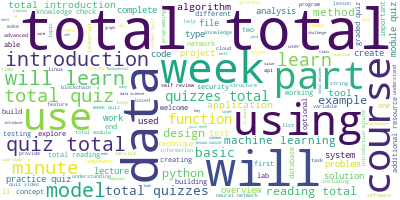

In [86]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(tmdf['syllabus'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Syllabus

In [87]:
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', "welcome", "minute", "course", "quiz", "lesson", "video", 
"project", "overview", "using", "week", "knowledge", "review", "understanding", "test", "data", "introduction", "learn", "learning", "part", "reading", "quizzes",
"testing", "practice", "total", "module"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielachacon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Syllabus

In [88]:
data = tmdf.syllabus.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
if not os.path.exists('./results/'):
    os.makedirs('./results/')
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

['development', 'environment', 'topic', 'three', 'key', 'concepts', 'toolkit', 'develop', 'programs', 'drawing', 'simple', 'shapes', 'coordinates', 'process', 'experience', 'writing', 'code', 'us', 'growth', 'mindset', 'programming', 'js', 'running', 'first', 'program', 'brackets', 'hacking', 'coordinate', 'systems', 'code']
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 3), (7, 2), (8, 1), (9, 2), (10, 8), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 5), (17, 2), (18, 1), (19, 2), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 1), (26, 2), (27, 4), (28, 1), (29, 2)]
[(0,
  '0.007*"analysis" + 0.006*"model" + 0.005*"exercise" + 0.005*"python" + '
  '0.004*"models" + 0.004*"also" + 0.004*"design" + 0.004*"regression" + '
  '0.004*"create" + 0.004*"code"'),
 (1,
  '0.005*"design" + 0.005*"check" + 0.005*"exercise" + 0.004*"also" + '
  '0.004*"programming" + 0.004*"create" + 0.004*"lecture" + 0.004*"code" + '
  '0.004*"optional" + 0.004*"resources"'),
 (2,
  '0.006*"lecture"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.000718 -0.006847       1        1  21.229174
2     -0.007832  0.005513       2        1  20.409185
0      0.000382 -0.017406       3        1  17.980552
5     -0.009702  0.016978       4        1  14.299777
3      0.026604  0.006455       5        1  14.166883
4     -0.010171 -0.004693       6        1  11.914429, topic_info=             Term        Freq       Total Category  logprob  loglift
1281      segment  180.000000  180.000000  Default  30.0000  30.0000
4051        scrum  108.000000  108.000000  Default  29.0000  29.0000
1751   blockchain  329.000000  329.000000  Default  28.0000  28.0000
1968           ai  328.000000  328.000000  Default  27.0000  27.0000
1687        notes  283.000000  283.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
414      complete   53.742467  432.426126   Topic6  -6.0042   0.0422
115          also   64.244924  670.422439   Topic6  -5.8257  -0.2178
81      resources   59.343211  617.759845   Topic6  -5.9051  -0.2153
556         model   59.221822  724.910716   Topic6  -5.9071  -0.3773
76    programming   51.246370  712.414236   Topic6  -6.0518  -0.5046

[523 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
304        1  0.138348     able
304        2  0.259402     able
304        3  0.176394     able
304        4  0.217898     able
304        5  0.127972     able
...      ...       ...      ...
112        6  0.134403  working
10857      2  0.532632    wrspm
4032       2  0.164252       xp
4032       4  0.082126       xp
4032       5  0.657010       xp

[1503 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 6, 4, 5])

## About This Course

In [89]:
data = tmdf.aboutThisCourse.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['mooc', 'provides', 'foundational', 'skill', 'set', 'required', 'write', 'computer', 'programs', 'interested', 'write', 'interactive', 'graphical', 'programs', 'introductory', 'level', 'real', 'programming', 'language', 'begin', 'basics', 'editing', 'running', 'programs', 'create', 'graphics', 'shapes', 'coordinates', 'finally', 'create']


In [90]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
if not os.path.exists('./results/'):
    os.makedirs('./results/')
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]
[(0,
  '0.007*"design" + 0.006*"programming" + 0.006*"also" + 0.005*"systems" + '
  '0.005*"computer" + 0.005*"specialization" + 0.005*"system" + '
  '0.005*"science" + 0.005*"machine" + 0.005*"end"'),
 (1,
  '0.008*"software" + 0.007*"also" + 0.006*"science" + 0.006*"analysis" + '
  '0.005*"programming" + 0.005*"specialization" + 0.005*"create" + '
  '0.005*"concepts" + 0.005*"machine" + 0.005*"tools"'),
 (2,
  '0.009*"programming" + 0.007*"machine" + 0.006*"design" + 0.006*"python" + '
  '0.006*"skills" + 0.005*"also" + 0.005*"science" + 0.005*"apply" + '
  '0.004*"concepts" + 0.004*"work"'),
 (3,
  '0.010*"machine" + 0.008*"python" + 0.006*"science" + 0.006*"models" + '
  '0.005*"applications" + 0.005*"programming" + 0.005*"en

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.021392 -0.002012       1        1  25.054731
0     -0.013421 -0.018297       2        1  19.602161
3     -0.014037  0.019755       3        1  18.623980
2     -0.001887 -0.007150       4        1  18.616801
4      0.007953  0.007704       5        1  18.102327, topic_info=                Term        Freq       Total Category  logprob  loglift
242          machine  343.000000  343.000000  Default  30.0000  30.0000
1081          design  256.000000  256.000000  Default  29.0000  29.0000
202           python  313.000000  313.000000  Default  28.0000  28.0000
154               ai  133.000000  133.000000  Default  27.0000  27.0000
278            cloud  199.000000  199.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
3           computer   31.798610  187.443647   Topic5  -5.8188  -0.0649
1081          design   33.614879  256.642538   Topic5  -5.7632  -0.3236
588   specialization   33.414644  269.126668   Topic5  -5.7692  -0.3771
83           science   33.315898  295.813134   Topic5  -5.7722  -0.4746
242          machine   31.764345  343.131575   Topic5  -5.8199  -0.6706

[457 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
218       1  0.237413   able
218       2  0.217628   able
218       3  0.148383   able
218       4  0.212682   able
218       5  0.183006   able
...     ...       ...    ...
40        4  0.389124  write
40        5  0.171215  write
2794      2  0.738355     ws
2795      2  0.553486   wsdl
5217      2  0.548932    zsh

[1022 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

## Title

In [91]:
data = tmdf.title.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
if not os.path.exists('./results/'):
    os.makedirs('./results/')
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

['computer', 'programming']
[(0, 1), (1, 1)]
[(0,
  '0.028*"science" + 0.017*"python" + 0.016*"capstone" + 0.015*"processing" + '
  '0.012*"machine" + 0.012*"cloud" + 0.012*"linux" + 0.010*"language" + '
  '0.009*"google" + 0.009*"ai"'),
 (1,
  '0.030*"machine" + 0.020*"analysis" + 0.020*"advanced" + 0.014*"capstone" + '
  '0.014*"science" + 0.009*"programming" + 0.009*"oriented" + 0.009*"google" + '
  '0.009*"engineering" + 0.009*"structures"'),
 (2,
  '0.033*"programming" + 0.023*"python" + 0.019*"machine" + 0.018*"cloud" + '
  '0.016*"software" + 0.015*"systems" + 0.014*"design" + 0.013*"processing" + '
  '0.013*"big" + 0.011*"fundamentals"'),
 (3,
  '0.019*"capstone" + 0.017*"programming" + 0.015*"cloud" + 0.015*"ai" + '
  '0.015*"robotics" + 0.013*"google" + 0.013*"fundamentals" + 0.011*"spring" + '
  '0.010*"networks" + 0.010*"neural"'),
 (4,
  '0.019*"development" + 0.014*"analysis" + 0.012*"programming" + '
  '0.012*"science" + 0.012*"analytics" + 0.012*"end" + 0.011*"python" +

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.019290 -0.036621       1        1  31.160080
0     -0.058272 -0.045430       2        1  18.372342
1     -0.050385 -0.053334       3        1  18.134021
4     -0.041213  0.129845       4        1  17.635986
3      0.130580  0.005539       5        1  14.697569, topic_info=            Term       Freq      Total Category  logprob  loglift
5        science  27.000000  27.000000  Default  30.0000  30.0000
138   processing  16.000000  16.000000  Default  29.0000  29.0000
552     robotics   5.000000   5.000000  Default  28.0000  28.0000
200     advanced  14.000000  14.000000  Default  27.0000  27.0000
13      analysis  23.000000  23.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
195       design   1.643324  22.109088   Topic5  -5.3814  -0.6818
7    development   1.637089  17.938378   Topic5  -5.3852  -0.4765
190         java   1.635761  11.999364   Topic5  -5.3861  -0.0753
445     business   1.631908  10.605434   Topic5  -5.3884   0.0459
387       visual   1.627168   8.204656   Topic5  -5.3913   0.2996

[355 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
580       1  0.223212   accounting
580       2  0.446424   accounting
580       4  0.223212   accounting
543       1  0.854232  acquisition
200       1  0.200088     advanced
...     ...       ...          ...
474       5  0.673618      website
706       2  0.386903     workflow
706       3  0.386903     workflow
706       5  0.193451     workflow
443       5  0.900088      working

[506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 5, 4])

# Linear Regression with Bootstrapping

## All-In Model

In [377]:
importantPartners = [
    "IBM", "Google", "University of Michigan", "Deeplearning.AI", "Duke University", "University of California San Diego", 
    "Meta", "University of California, Irvine", "Vanderbilt University", "Stanford University", "University of California, Davis"
]

for p in importantPartners:
    temp = []
    for arr in coursera['partners']:
        found = False
        for t in arr:
            if p == t:
                found = True
                break
        temp.append(found)
    coursera[p] = temp

In [378]:
from sklearn.linear_model import LinearRegression

modeldf = coursera.copy()

modeldf.head()

link       date  \
0  https://www.coursera.org/learn/introduction-to... 2023-08-05   
1  https://www.coursera.org/learn/how-computers-w... 2023-08-05   
2  https://www.coursera.org/learn/mathematics-for... 2023-08-05   
3  https://www.coursera.org/learn/python-for-appl... 2023-08-05   
4  https://www.coursera.org/learn/what-is-datasci... 2023-08-05   

                                       title  \
0       Introduction to Computer Programming   
1                         How Computers Work   
2           Mathematics for Computer Science   
3  Python for Data Science, AI & Development   
4                      What is Data Science?   

                                          subheading  ratingPercentage  \
0  This course is part of Introduction to Compute...              91.0   
1  This course is part of Introduction to Compute...              94.0   
2  This course is part of Introduction to Compute...              82.0   
3  This course is part of multiple programs. \nLe...              93.0   
4  This course is part of multiple programs. \nLe...              97.0   

   rating  ratingCount  enrolledCount  recentViews  instructorRatingCount  \
0     4.1        805.0        69167.0           -1                  202.0   
1     4.6        508.0        32711.0           -1                  122.0   
2     4.1        203.0        30138.0           -1                   51.0   
3     4.6      32545.0       608517.0           -1                 6493.0   
4     4.7      64199.0       817744.0           -1                16960.0   

   instructorRating  reviewCount  reviewRating  \
0               4.3           -1           4.1   
1               4.7           -1           4.6   
2               4.6           -1           4.1   
3               4.5           -1           4.6   
4               4.7           -1           4.7   

                                     aboutThisCourse  contentRating  \
0  There are 3 modules in this course\n\nThis MOO...             -1   
1  There are 4 modules in this course\n\nComputer...             -1   
2  There are 6 modules in this course\n\n“Welcome...             -1   
3  There are 5 modules in this course\n\nKickstar...             -1   
4  There are 3 modules in this course\n\nDo you w...             -1   

   contentRatingCount                                           syllabus  \
0                  -1  [[Your development environment, 9 hours to com...   
1                  -1  [[Abstraction, 1 hour to complete, This week s...   
2                  -1  [[Number bases - binary, 7 hours to complete, ...   
3                  -1  [[Python Basics, 2 hours to complete, This mod...   
4                  -1  [[Defining Data Science and What Data Scientis...   

                                            partners  \
0  (University of London, Goldsmiths, University ...   
1  (University of London, Goldsmiths, University ...   
2  (University of London, Goldsmiths, University ...   
3                                             (IBM,)   
4                                             (IBM,)   

                                    whatYouWillLearn  \
0                                                 []   
1                                                 []   
2  [1.     Transform numbers between number bases...   
3  [Describe Python Basics including Data Types, ...   
4  [Define data science and its importance in tod...   

                                              skills  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [Data Science, Python Programming, Data Analys...   
4  [Data Science, Deep Learning, Machine Learning...   

                                       productGlance  \
0  [[Beginner level, No previous experience neces...   
1  [[Beginner level, No previous experience neces...   
2  [[Beginner level, No previous experience neces...   
3  [[Beginner level, Recomme

In [379]:
modeldf.drop(columns = ['link', 'date', 'title', 'subheading', 'recentViews', 'reviewCount', 'contentRating', 'contentRatingCount', 'syllabus', 'detailsToKnow', 'aboutThisCourse', 'reviewStarPercentage', 'learnerCareerOutcomes', 'partners', 'whatYouWillLearn', 'skills', 'productGlance', 'instructors'], inplace=True)

In [381]:
modeldf = modeldf.applymap(lambda x: 1 if x == True else (0 if x == False else x))
modeldf['experienceLevel'] = modeldf['experienceLevel'].astype('category')
modeldf['experienceLevel'] = modeldf['experienceLevel'].cat.codes
modeldf['largerCourseType'] = modeldf['largerCourseType'].astype('category')
modeldf['largerCourseType'] = modeldf['largerCourseType'].cat.codes
modeldf['earnCertificate'] = modeldf['earnCertificate'].astype('category')
modeldf['earnCertificate'] = modeldf['earnCertificate'].cat.codes
modeldf.head()

/var/folders/j1/cxdv4vmj4dd3_qz33tpybty80000gn/T/ipykernel_11253/1474144551.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



ratingPercentage  rating  ratingCount  enrolledCount  \
0              91.0     4.1        805.0        69167.0   
1              94.0     4.6        508.0        32711.0   
2              82.0     4.1        203.0        30138.0   
3              93.0     4.6      32545.0       608517.0   
4              97.0     4.7      64199.0       817744.0   

   instructorRatingCount  instructorRating  reviewRating  courseraPlus  \
0                  202.0               4.3           4.1             1   
1                  122.0               4.7           4.6             1   
2                   51.0               4.6           4.1             1   
3                 6493.0               4.5           4.6             0   
4                16960.0               4.7           4.7             0   

   fiveStarReviewPercentage  fourStarReviewPercentage  \
0                     60.12                     16.52   
1                     72.63                     19.88   
2                     58.12                     17.24   
3                     71.96                     20.82   
4                     76.12                     19.12   

   threeStarReviewPercentage  twoStarReviewPercentage  \
0                       8.07                     2.73   
1                       4.33                     1.57   
2                      10.83                     5.41   
3                       4.60                     1.47   
4                       3.26                     0.80   

   oneStarReviewPercentage  hasPython  hasMachineLearning  hasDataAnalysis  \
0                    12.54          0                   0                0   
1                     1.57          0                   0                0   
2                     8.37          0                   0                0   
3                     1.29          1                   0                1   
4                     0.84          0                   1                0   

   hasDataScience  hasAlgorithms  hasSQL  hasAI  hasRProgramming  \
0               0              0       0      0                0   
1               0              0       0      0                0   
2               0              0       0      0                0   
3               1              0       0      0                0   
4               1              0       0      0                0   

   hasDataVisualization  hasDebugging  hasCloudComputing  hasMySQL  \
0                     0             0                  0         0   
1                     0             0                  0         0   
2                     0             0                  0         0   
3                     0             0                  0         0   
4                     0             0                  0         0   

   hasDeepLearning  hasCProgramming  hasTensorflow  hasLinux  hasJavaScript  \
0                0                0              0         0              0   
1                0                0              0         0              0   
2                0                0              0         0              0   
3                0                0              0         0              0   
4                1                0              0         0              0   

   hasInternetOfThings  hasDatabase  hasDjango  hasFrontEnd  hasGithub  \
0                    0            0          0            0          0   
1                    0            0          0            0          0   
2                    0            0          0            0          0   
3                    0            0          0            0          0   
4                    0            0          0            0          0   

   instructorRatingFraction  ratingFraction  hoursToComplete  experienceLevel  \
0                  0.002920        0.011638             21.0                2   
1                  0.003730        0.015530              8.0                2   
2                  0.001692        0.006736            

In [383]:
modeldf = modeldf.dropna(subset=['fiveStarReviewPercentage', "instructorRatingFraction", "moduleCount"])
modeldf = modeldf[modeldf['enrolledCount'] < 500000]


y = modeldf['enrolledCount'].dropna()
X = modeldf.drop(columns=['enrolledCount','topInstructorCount', 'instructorCount', "ratingPercentage", 'ratingCount', 'instructorRatingCount']).dropna() # Instructor Counts are Bugged

In [384]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [385]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: Fut

LinearRegression()

In [386]:
c = lr.intercept_
m = lr.coef_
y_pred_train = lr.predict(X_train)

fig = px.scatter(x=y_train,y=y_pred_train)
fig.update_xaxes(title_text='actual')
fig.update_yaxes(title_text='predict')
fig.show()

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [387]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(r2_score(y_train, y_pred_train))
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

0.5882852444273068
55139.57470279093


/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [388]:
y_pred_test = lr.predict(x_test)
fig = px.scatter(x=y_test, y=y_pred_test)
fig.update_xaxes(title_text='Actual')
fig.update_yaxes(title_text='Predict')

fig.show()

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [389]:
print(r2_score(y_test, y_pred_test))
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

0.3748842281463698
55139.57470279093


/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [390]:
X.dropna()

rating  instructorRating  reviewRating  courseraPlus  \
0       4.1               4.3           4.1             1   
1       4.6               4.7           4.6             1   
2       4.1               4.6           4.1             1   
5       4.5               4.5           4.5             0   
6       4.6               4.6           4.6             0   
..      ...               ...           ...           ...   
676     4.6               4.5           4.6             0   
677     4.6               4.7           4.6             0   
678     4.7               4.9           4.7             0   
679     4.5               4.8           4.5             0   
680     4.4               4.5           4.4             0   

     fiveStarReviewPercentage  fourStarReviewPercentage  \
0                       60.12                     16.52   
1                       72.63                     19.88   
2                       58.12                     17.24   
5                       67.09                     22.15   
6                       71.29                     21.46   
..                        ...                       ...   
676                     73.38                     20.99   
677                     73.28                     19.49   
678                     76.47                     17.64   
679                     67.64                     22.05   
680                     63.04                     23.91   

     threeStarReviewPercentage  twoStarReviewPercentage  \
0                         8.07                     2.73   
1                         4.33                     1.57   
2                        10.83                     5.41   
5                         6.71                     2.20   
6                         4.91                     1.56   
..                         ...                      ...   
676                       3.62                     0.72   
677                       3.61                     1.44   
678                       2.94                     1.47   
679                       4.41                     2.94   
680                       8.69                     3.26   

     oneStarReviewPercentage  hasPython  hasMachineLearning  hasDataAnalysis  \
0                      12.54          0                   0                0   
1                       1.57          0                   0                0   
2                       8.37          0                   0                0   
5                       2.00          1                   0                0   
6                       0.85          0                   0                1   
..                       ...        ...                 ...              ...   
676                     1.37          0                   0                0   
677                     2.16          0                   0                0   
678                     1.47          0                   0                0   
679                     2.94          0                   0                0   
680                     1.08          0                   0                0   

     hasDataScience  hasAlgorithms  hasSQL  hasAI  hasRProgramming  \
0                 0              0       0      0                0   
1                 0              0       0      0                0   
2                 0              0       0      0                0   
5                 1              0       0      0                0   
6                 1              0       0      0                0   
..              ...            ...     ...    ...              ...   
676               0              0       0      0                0   
677               0              0       0      0                0   
678               0              0       0      0                0   
679               0              0       0      0                0   
680               0              0       0      0                0   

     hasDataVisualization  hasDebugging  hasCloudCom

In [430]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import sklearn

from numpy import mean
from numpy import absolute
from numpy import sqrt

boot=100

bootstrapdf = pd.DataFrame(X)
bootstrapdf['Y'] = y

bootstrapdf.head()

def bootstrapLR(bootstrapdf):
    output = {    
   "betas": [],
    "preds":[],
    "r2_train":[],
    "r2_test":[],
    "rmse_train":[],
    "rmse_test": []}

    # trainpreds = []

    for i in range(boot):
        df1=bootstrapdf.sample(len(bootstrapdf),replace=True)
        num_splits = 5
        
        df1_X = df1.drop(columns='Y')
        df1_Y = df1['Y']
        lr = LinearRegression()
        
        kf = KFold(n_splits=num_splits, shuffle=True) 
        
        for train_idx, test_idx in kf.split(df1):
            
            X_train, X_test, Y_train, Y_test = df1_X.iloc[train_idx], df1_X.iloc[test_idx], df1_Y.iloc[train_idx], df1_Y.iloc[test_idx]

            model = lr.fit(X_train, Y_train)
            Y_pred_train = model.predict(X_train)
            Y_pred_test = model.predict(X_test)

            # scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
            output["rmse_train"].append(sqrt(sklearn.metrics.mean_squared_error(Y_train,Y_pred_train)))
            output["rmse_test"].append(sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_test)))
            # scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=kf, n_jobs=-1)
            output["r2_train"].append(sklearn.metrics.r2_score(Y_train,Y_pred_train))
            output["r2_test"].append(sklearn.metrics.r2_score(Y_test,Y_pred_test))

            output["betas"].append(model.coef_)
            # trainpreds.append(y_pred_train)
            # preds.append(y_pred_test)
    return output

In [432]:
output = bootstrapLR(bootstrapdf)

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/danielachacon/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: Fut

In [400]:
print(f''' r2: {len(r2[0])}, betas: {len(betas[0])}, preds: {len(preds[0])}, train: {len(trainpreds[0])}''')
print(f''' rsme: {rmse[0]}, r2: {r2[0]}''')


 r2: 5, betas: 53, preds: 119, train: 472
 rsme: 70131.28778525657, r2: [0.53371278 0.35084949 0.49796341 0.62563067 0.42789779]


In [393]:
betasdf = pd.DataFrame(output['betas'], columns=["Column_" + str(i) for i in range(len(output["betas"][0]))])
betasdf.head()

Column_0      Column_1       Column_2      Column_3     Column_4  \
0  168031.150773 -24947.854759  168031.150773   9991.433250 -2119.713720   
1  193785.670875 -24498.528304  193785.670876  13137.279677 -2143.952784   
2  185829.265553 -30079.466108  185829.265553   7857.821478 -3028.865606   
3  158109.887149 -39317.367300  158109.887149  11579.046543 -2154.267080   
4  153289.678316 -17495.094669  153289.678316  13991.686824 -2440.512568   

      Column_5     Column_6     Column_7      Column_8      Column_9  \
0  2188.234155  3750.664987  4459.167266  12685.888160 -25489.522159   
1  2818.193841  4412.254616  5810.457028  14691.264277 -30235.247573   
2  1851.873209  3909.550935  5385.281345  12598.114068 -43174.397487   
3  2245.689659  3582.788173  2756.420318  11348.186695 -26883.717685   
4  1660.200563  3271.592959  3148.633551  11731.365252 -24443.847660   

      Column_10     Column_11     Column_12      Column_13     Column_14  \
0   6271.022055  24148.250927  75128.629683   78849.340836  -2792.524723   
1  18391.203518  31183.659910  74459.727005   82698.104787  -2402.471739   
2   9639.623737  23316.527047  55648.973909  100723.375640  17236.785528   
3   2804.997167  35689.812851  49931.934729   60504.103658    379.748691   
4   2463.112064  27209.303324  84229.807224   88167.770106  11218.292785   

      Column_15     Column_16     Column_17     Column_18     Column_19  \
0 -53498.867351  -7852.027665  70357.509370  15001.101151  -6196.664807   
1 -66224.199423 -12795.573879  54555.021245   8781.182640 -24492.550194   
2 -44563.599252 -15813.114240  59201.304705  24693.099513 -27668.625931   
3 -59979.979888 -15478.531652  54478.502146  11699.634699  -5746.695800   
4 -57117.667381 -19743.693413  55554.906396  20589.209298   5163.349970   

      Column_20     Column_21     Column_22     Column_23     Column_24  \
0  16723.649173  34993.740841 -25444.571473  17644.264251   2142.004992   
1 -34434.114232  40146.185150  -8590.987668  -4076.994099  -2179.547729   
2  -4901.235176  32688.887950 -12441.962977  17261.358421 -15011.716289   
3  27387.174295  52133.377199 -34922.579006  25553.957863   4417.430440   
4  45298.264904  95303.439459  -2931.903001  58255.962053  20101.550040   

      Column_25     Column_26     Column_27     Column_28     Column_29  \
0  43910.848014  27215.518717  -6695.529953  13143.220951  69047.034599   
1  37555.718058  14598.341940  12754.551445  19754.440209  43969.076495   
2  43992.979002  33129.902066 -18829.883576  38264.810569  54033.383048   
3  28858.554139  36543.210156  -4127.930816  17537.911530  47414.854747   
4  31907.844495  71879.115271 -44954.388416  15412.992505  46424.102589   

      Column_30     Column_31     Column_32    Column_33    Column_34  \
0  61007.434841  4.273353e+06  2.342353e+06  2003.015132 -4350.155848   
1  42193.665557  5.022882e+06  2.470126e+06  1788.438471  -603.588314   
2  98686.601035  4.750554e+06  2.173795e+06  1643.384321 -1285.012419   
3  19503.019592  4.054824e+06  2.043518e+06  1732.577702 -2846.646293   
4  83050.016960  4.948278e+06  2.140590e+06  1718.120683 -1596.969180   

      Column_35     Column_36     Column_37      Column_38     Column_39  \
0   7187.844667   6549.030531   -519.586910 -144800.134528 -11370.284318   
1  17399.342641  19053.350596  25571.411401  -98232.075102   1564.723176   
2   7483.254748   2078.138679  51456.191798 -118012.270828  10073.346331   
3  10992.807528   9287.895010  27115.376264 -106697.748981   2149.498330   
4   3184.176752  14911.039184  18659.319067 -128605.049420  -4461.722292   

     Column_40     Column_41     Column_42      Column_43     Column_44  \
0 -5141.688385  36738.596729 -20669.243535  134834.857946  24563.542845   
1 -3151.785282  15939.255010 -14768.217651  181325.951619  18983.323151   
2 -4333.033602  25483.499161 -17588.635210  163414.954784  -1207.331770   
3 -5191.095866  42902.166868 -12009.832129  136797.033082  13652.046415   
4 -4341.847662  20994.580738 -27814.1

In [395]:
betasDicts = {}
include = []
for i in range(len(output["betas"][0])):
    CI=(np.percentile(betasdf['Column_'+str(i)].tolist(),2.5),np.percentile(betasdf['Column_'+str(i)].tolist(),97.5))
    tempDict = {
    "values": betasdf['Column_'+str(i)].tolist(),
    "mean":  np.mean(betasdf['Column_'+str(i)].tolist()),
    "fstQTR": CI[0],
    "trdQTR": CI[1]
    }
    betasDicts['beta_'+str(i)] = tempDict
    if CI[0] > 0:
        include.append(i)

In [396]:
include

[0, 2, 3, 17, 31, 32, 33, 43, 44, 46, 47]

Only include 1,2,5,35,46,49 in the next rounds of modelling (1 and 2 were directly infleunced by enrollcount so I removed it and refit model)

Next Run: Include [0, 2, 3, 17, 31, 32, 33, 43, 44, 46, 47]
['rating', 'reviewRating', 'courseraPlus', 'hasDataVisualization', 'instructorRatingFraction', 'ratingFraction', 'hoursToComplete', 'Google', 'University of Michigan', 'Duke University', 'University of California San Diego']

In [404]:
column_indices = [0, 2, 3, 17, 31, 32, 33, 43, 44, 46, 47]

# Get the column names for the specified column indices
column_names = [df1_X.columns[i] for i in column_indices]

# Print the column names
print(column_names)


['rating', 'reviewRating', 'courseraPlus', 'hasDataVisualization', 'instructorRatingFraction', 'ratingFraction', 'hoursToComplete', 'Google', 'University of Michigan', 'Duke University', 'University of California San Diego']


In [433]:
betas_matrix = np.array(output["betas"])

betas_dict = [{
    "coefficient": regressor_name ,
    "mean": np.mean(beta_distribution),  
    "95% CI lower": np.quantile(beta_distribution, 0.025),  
    "95% CI upper": np.quantile(beta_distribution, 0.975),  
    "std": np.std(beta_distribution)  
    }

for (beta_distribution, regressor_name) in zip(betas_matrix.T, column_names)

]

pd.DataFrame.from_records(betas_dict)

coefficient           mean  95% CI lower  \
0                               rating  136590.542067  35712.679347   
1                         reviewRating   -1078.706764 -32058.735785   
2                         courseraPlus  136590.542067  35712.679347   
3                 hasDataVisualization   18095.598982   1489.348997   
4             instructorRatingFraction   -4005.188888  -8146.386358   
5                       ratingFraction     -88.176285  -4462.057527   
6                      hoursToComplete     878.935745  -4173.883726   
7                               Google    1889.691209  -5177.660921   
8               University of Michigan    8514.170276    643.995810   
9                      Duke University   -2015.992982 -35985.177085   
10  University of California San Diego    1971.599041 -34652.218544   

     95% CI upper           std  
0   233407.914068  48604.049209  
1    23920.744419  13463.831367  
2   233407.914068  48604.049209  
3    36144.465510   8894.124899  
4      278.604692   2048.695855  
5     4522.788244   2108.300228  
6     5754.779770   2505.518197  
7     9438.549017   3653.252409  
8    16799.063793   4071.008003  
9    30320.755244  18226.576968  
10   42853.639600  19950.966592

Remove reviewRating or rating

rating is the same as coursera plus?

make rmse, std, r2

In [434]:
graphBeta = "beta_0"

histogram = go.Histogram(x=betasDicts[graphBeta]['values'], name='Histogram')

mean_line = go.Scatter(x=[betasDicts[graphBeta]['mean'], betasDicts[graphBeta]['mean']], mode='lines', name='Mean', line=dict(color='red'))

fstQTR_line = go.Scatter(x=[betasDicts[graphBeta]['fstQTR'], betasDicts[graphBeta]['fstQTR']], mode='lines', name='First Quartile', line=dict(color='blue'))

trdQTR_line = go.Scatter(x=[betasDicts[graphBeta]['trdQTR'], betasDicts[graphBeta]['trdQTR']], mode='lines', name='Third Quartile', line=dict(color='green'))

fig = go.Figure(data=[histogram, mean_line, fstQTR_line, trdQTR_line])

fig.show()

In [420]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

boot=100

bootstrapdf = pd.DataFrame(X)
bootstrapdf['Y'] = y

bootstrapdf.head()

betas=[]
preds=[]
r2 = []
rmse = []
trainpreds = []

selected_columns = ['rating', 'courseraPlus', 'hasDataVisualization',
                    'instructorRatingFraction', 'ratingFraction', 'hoursToComplete',
                    'Google', 'University of Michigan', 'Duke University', 'University of California San Diego']

bootstrapdf = bootstrapdf[selected_columns]
output = bootstrapLR(bootstrapdf)

NameError: name 'bootstrapLR' is not defined

In [418]:
print(f''' r2: {len(r2[0])}, betas: {len(betas[0])}, preds: {len(preds[0])}, train: {len(trainpreds[0])}''')
print(f''' rsme: {rmse[0]}, r2: {r2[0]}''')

 r2: 5, betas: 10, preds: 119, train: 472
 rsme: 71551.2506935284, r2: [0.36283976 0.33817298 0.19410491 0.32997385 0.39450261]


In [419]:
betasdf = pd.DataFrame(betas, columns=["Column_" + str(i) for i in range(len(betas[0]))])
betasdf.head()

Column_0      Column_1      Column_2      Column_3      Column_4  \
0  -314.941372  20107.260857  23583.328750  8.586254e+06  1.582149e+06   
1  -741.924837  17257.196567  34712.469584  9.071835e+06  1.997379e+06   
2  -240.673453  16008.017748  44717.714367  8.705853e+06  1.880526e+06   
3  -216.577030  23810.324203  50503.396693  5.688879e+06  1.816628e+06   
4  7120.242218  20631.617341  50683.623084  4.966827e+06  2.487664e+06   

      Column_5      Column_6      Column_7      Column_8      Column_9  
0  2227.314128  71077.800779  40098.854116  23433.508036  75470.373616  
1  2516.302806  90562.214759  61300.628484  23146.737530  48814.970837  
2  2324.233933  92693.650044  44946.163170  26958.409698  59886.485906  
3  1721.635686  89837.073304  39892.537689  13131.014157  52949.781664  
4  2403.988301  78505.051439  46344.805316  30319.468313  49214.387579